In [10]:
pip install apyori;


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Pernyataan `import` ini mengimpor semua paket yang diperlukan untuk analisis asosiasi. `pandas` digunakan untuk manipulasi data, `numpy` untuk operasi matematika, `apyori` untuk menerapkan algoritma Apriori, dan `apriori` dan `association_rules` dari `mlxtend.frequent_patterns` untuk analisis aturan asosiasi.


In [11]:
#import all required packages..
import pandas as pd
import numpy as np
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [12]:
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('joyoalkes 2023 - Data penjualannya.csv')

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Kode Transaksi', 'Kode Barang'])

# Normalize the data
df_normalized = df.groupby('Kode Transaksi')['Kode Barang'].apply(list).reset_index()

# Print the normalized DataFrame
print(df_normalized)



              Kode Transaksi            Kode Barang
0       48522020230102085555     [btraiqltbntdnger]
1       48522020230102093055                3]
2       48522020230102093215           [O26m3part2]
3       48522020230102093230                3]
4       48522020230102093340           [Btgkca10cm]
...                      ...                    ...
4496    48522020231230142356  [Lumbalm, krsetlumbL]
4497    48522020231230142455          [kaki4nomerk]
4498    48522020231230144828  [tensionevoice, mic1]
4499    48522020231230144845   [freshcarekayuputih]
4500  Laporan_485220_2023_09                  [nan]

[4501 rows x 2 columns]


In [13]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


"Dataframe awal df diubah dengan mengambil hanya dua kolom yang relevan, yaitu 'Kode Transaksi' dan 'Nama Barang', sedangkan kolom-kolom lainnya diabaikan. Langkah ini dilakukan untuk mempersiapkan data yang akan digunakan dalam analisis Apriori, di mana hanya informasi tentang transaksi (Kode Transaksi) dan item-item yang dibeli (Nama Barang) yang relevan untuk mengidentifikasi pola pembelian yang mungkin terjadi."


In [21]:
# Filter df_normalized di mana 'Kode Barang' memiliki lebih dari satu nilai
df_multiple_items = df_normalized[df_normalized['Kode Barang'].str.len() > 1]

# Tampilkan DataFrame yang telah difilter
print(df_multiple_items)

            Kode Transaksi                          Kode Barang
6     48522020230102093537             [Undrpdnmed, mic1, mic2]
17    48522020230103081233                  [nec28, O26m3part2]
18    48522020230103081320      [O26m3part2, rgltrmedicallotus]
31    48522020230104101419                       [O21m3, 026m3]
34    48522020230104114727                       [O21m3, 026m3]
...                    ...                                  ...
4464  48522020231227143702                  3, O26m3part2]
4470  48522020231229082043                    [O26m3part2, Co6]
4490  48522020231230084805  [needleholderiedstuff, benangjahit]
4496  48522020231230142356                [Lumbalm, krsetlumbL]
4498  48522020231230144828                [tensionevoice, mic1]

[672 rows x 2 columns]


Tentu, berikut adalah penjelasan langkah-langkahnya:

1. **Inisialisasi TransactionEncoder**: `TransactionEncoder` adalah objek yang digunakan untuk mengubah data transaksi menjadi bentuk yang dapat diproses oleh algoritma asosiasi. Ini akan mengonversi data transaksi ke dalam bentuk array boolean di mana setiap kolom akan mewakili keberadaan atau ketiadaan suatu item dalam transaksi.

2. **Mengaplikasikan TransactionEncoder pada 'Kode Barang' di df_multiple_items**: `te.fit(df_multiple_items['Kode Barang'])` digunakan untuk mempelajari item apa saja yang ada dalam data transaksi. Kemudian, `transform(df_multiple_items['Kode Barang'])` akan mengubah setiap transaksi menjadi array boolean berdasarkan pembelajaran yang telah dilakukan.

3. **Membuat DataFrame baru dengan array boolean dan nama kolom dari TransactionEncoder**: `df_encoded = pd.DataFrame(te_ary, columns=te.columns_)` akan membuat DataFrame baru dari array boolean yang dihasilkan, di mana setiap kolom akan mewakili satu item dan setiap baris akan mewakili satu transaksi.

4. **Menjalankan algoritma Apriori dengan support minimum 0.02**: `apriori(df_encoded, min_support=0.02, use_colnames=True)` akan menjalankan algoritma Apriori untuk menemukan itemset yang sering muncul bersama-sama (frequent itemsets) dengan support minimum 0.02.

5. **Menjalankan association rules dengan confidence minimum 0.4**: `association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)` akan menjalankan algoritma untuk menemukan aturan asosiasi dengan confidence minimum 0.4 dari frequent itemsets yang telah ditemukan sebelumnya.

6. **Menampilkan frequent itemsets**: `print(frequent_itemsets)` akan menampilkan itemset yang sering muncul bersama-sama beserta supportnya.

7. **Menampilkan association rules**: `print(rules)` akan menampilkan aturan asosiasi yang ditemukan beserta metrik-metriknya seperti antecedents (item/itemset yang menjadi syarat), consequents (item/itemset yang menjadi hasil), support, confidence, dan lift.


In [22]:

# Inisialisasi TransactionEncoder
te = TransactionEncoder()
# Mengaplikasikan TransactionEncoder pada 'Kode Barang' di df_multiple_items dan mengubahnya menjadi array boolean
te_ary = te.fit(df_multiple_items['Kode Barang']).transform(df_multiple_items['Kode Barang'])
# Membuat DataFrame baru dengan array boolean dan nama kolom dari TransactionEncoder
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Menjalankan algoritma Apriori dengan support minimum 0.1
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Menampilkan frequent itemsets
print(frequent_itemsets)

# Menjalankan association rules dengan confidence minimum 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Menampilkan association rules
print(rules)




     support                 itemsets
0   0.080357                  (026m3)
1   0.026786                  (Ar6m3)
2   0.029762                    (Co6)
3   0.029762                 (Geacan)
4   0.028274                   (Kom8)
5   0.022321               (Marwapin)
6   0.324405                  (O21m3)
7   0.187500             (O26m3part2)
8   0.026786              (alkhol1lt)
9   0.028274            (alkswonemed)
10  0.068452          (canulcosmomed)
11  0.075893         (onehealthcanul)
12  0.114583                    (reg)
13  0.020833      (rgltrmedicallotus)
14  0.028274              (snelchart)
15  0.078869                 (t021m3)
16  0.062500                 (t026m3)
17  0.020833                     (tr)
18  0.043155           (O21m3, 026m3)
19  0.119048      (O21m3, O26m3part2)
20  0.038690   (O21m3, canulcosmomed)
21  0.055060  (O21m3, onehealthcanul)
22  0.063988            (t021m3, reg)
23  0.049107            (t026m3, reg)
        antecedents consequents  antecedent suppor

Data dari DataFrame df diubah menjadi format transaksional untuk analisis pola pembelian menggunakan algoritma Apriori. Langkah-langkah ini melibatkan pengelompokkan data berdasarkan 'Kode Transaksi' dan 'Nama Barang', diikuti dengan perhitungan frekuensi kemunculan setiap pasangan 'Kode Transaksi' dan 'Nama Barang'. Hasilnya diubah menjadi matriks dengan 'Kode Transaksi' sebagai indeks baris, 'Nama Barang' sebagai kolom, dan frekuensi kemunculan sebagai nilai sel. Selanjutnya, nilai-nilai yang hilang (yang menunjukkan bahwa suatu item tidak dibeli dalam suatu transaksi) diisi dengan nilai 0. Proses ini menghasilkan representasi data yang sesuai untuk analisis asosiasi pembelian.


In [23]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


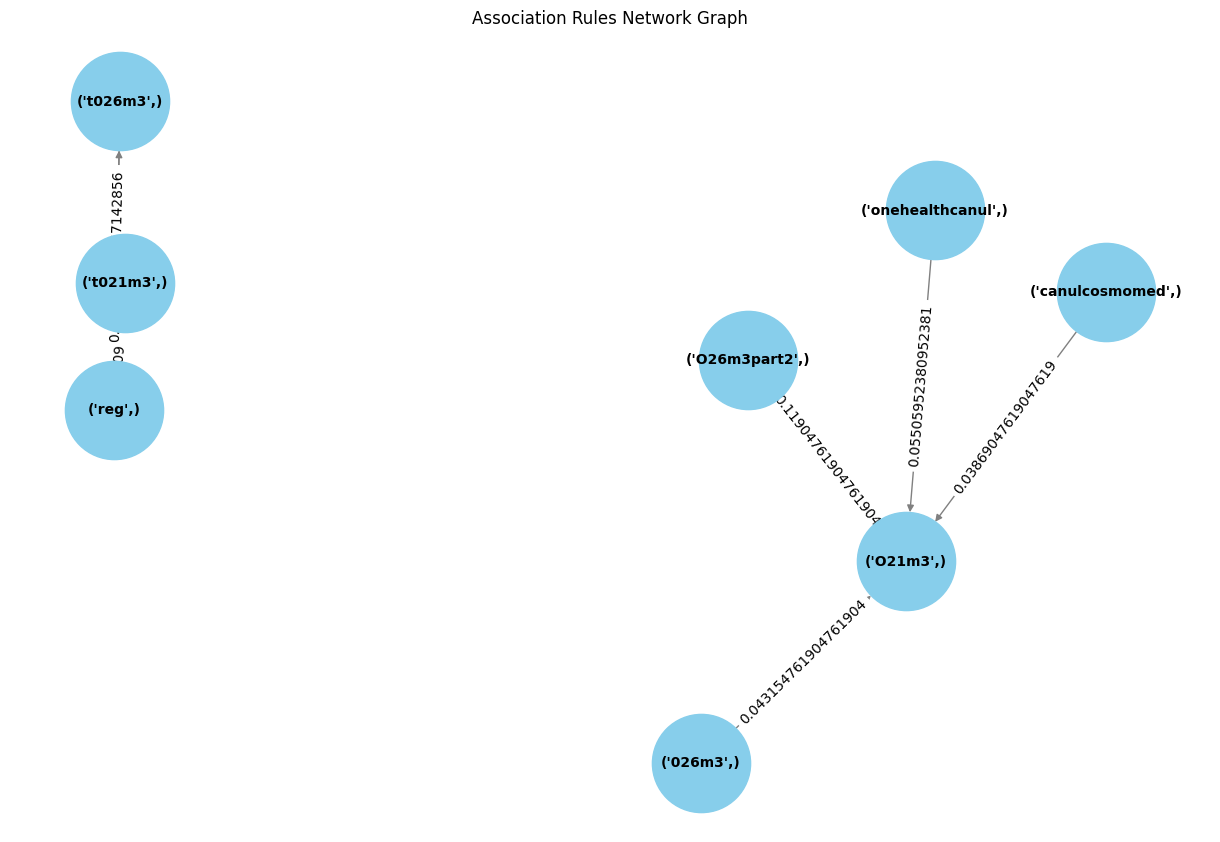

In [27]:
# Import library yang diperlukan
import networkx as nx  # Library untuk membuat dan memanipulasi grafik
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi

# Membuat graph dari rules
G = nx.DiGraph()  # Membuat graph dengan tipe directed graph (DiGraph) untuk menunjukkan arah asosiasi
for idx, row in rules.iterrows():  # Iterasi melalui setiap aturan asosiasi dalam DataFrame rules
    # Menambahkan edge (sisi) pada graph G dengan antecedents sebagai node awal dan consequents sebagai node tujuan
    # Weight (berat) edge ditentukan oleh support dari aturan asosiasi
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

# Menyimpan posisi node menggunakan spring layout
pos = nx.spring_layout(G)

# Membuat visualisasi graph
plt.figure(figsize=(12, 8))  # Mengatur ukuran gambar
nx.draw(G, pos,  # Menggambar graph G dengan posisi node pos
        with_labels=True,  # Menampilkan label pada node
        node_size=5000,  # Ukuran node
        node_color='skyblue',  # Warna node
        font_size=10,  # Ukuran font label node
        font_weight='bold',  # Ketebalan font label node
        edge_color='gray')  # Warna edge
# Menampilkan label pada edge berupa support
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Association Rules Network Graph')  # Memberikan judul pada visualisasi
plt.show()  # Menampilkan visualisasi
